In [1]:
import os
import cv2
import pandas as pd
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color
from skimage import filters
from skimage import util
from skimage import img_as_ubyte
from skimage import exposure

In [2]:
path = "D:\Download\Data Crop\Klasifikasi Dengan DOPI"
print(os.listdir(path))

['Dopi 0 (2).JPG', 'Dopi 0 (3).jpg', 'Dopi 0 (4).jpg', 'Dopi 0.jpg', 'Dopi 1 (2).JPG', 'Dopi 1 (3).JPG', 'Dopi 1 (4).JPG', 'Dopi 1.JPG', 'Dopi 2 (1).JPG', 'Dopi 2 (10).JPG', 'Dopi 2 (11).JPG', 'Dopi 2 (12).JPG', 'Dopi 2 (13).JPG', 'Dopi 2 (14).JPG', 'Dopi 2 (15).JPG', 'Dopi 2 (16).JPG', 'Dopi 2 (17).jpg', 'Dopi 2 (18).JPG', 'Dopi 2 (19).JPG', 'Dopi 2 (2).JPG', 'Dopi 2 (20).JPG', 'Dopi 2 (21).JPG', 'Dopi 2 (3).JPG', 'Dopi 2 (4).JPG', 'Dopi 2 (5).JPG', 'Dopi 2 (6).JPG', 'Dopi 2 (7).JPG', 'Dopi 2 (8).JPG', 'Dopi 2 (9).JPG', 'Dopi 2.JPG', 'Dopi 3.jpg']


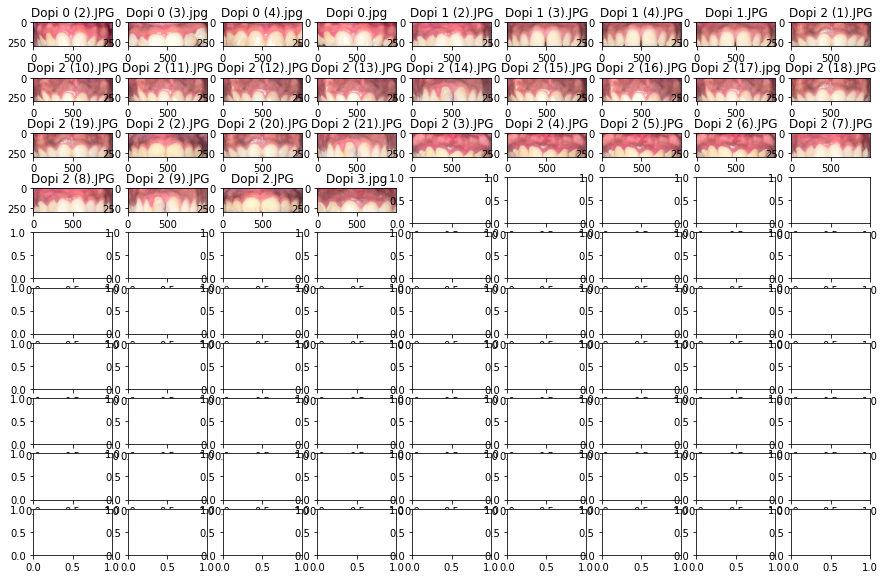

In [3]:
path = "D:\Download\Data Crop\Klasifikasi Dengan DOPI"
data = []
image_name = os.listdir(path)
for image in os.listdir(path):
    image_path = os.path.join(path, image)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(1000,300))
    data.append(img)

fig, ax = plt.subplots(nrows=10, ncols=9, figsize=(15, 10))
for i in range (len(data)):
    ax = ax.flatten()
    ax[i].set_title(image_name[i])
    ax[i].imshow(data[i],cmap = 'gray')

In [4]:
data[1].shape

(300, 1000, 3)

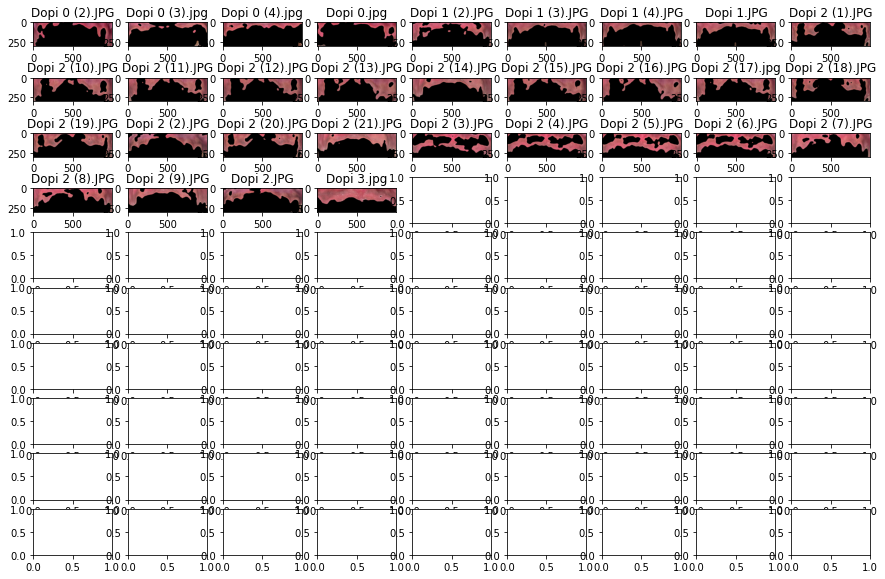

In [5]:
data_pigmentasi = []
data_pixel = []
data_area = []
data_area_seg = []
data_red = []
data_blue = []
data_green = []

data_pixel1 = []
data_area1 = []
data_area_seg1 = []



for i in range (len(data)):
    img = data[i]
    img = cv2.resize(img,(1000,300))
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    p2 = np.percentile(img_gray, 0)
    p98 = np.percentile(img_gray, 93)
    img_rescale = exposure.rescale_intensity(img_gray, in_range=(p2, p98))
    
    im_filt1=ndi.median_filter(img_rescale, size=30)
    
    
    ret, thresh = cv2.threshold(im_filt1,120,255,cv2.THRESH_TOZERO_INV)
    ret, thresh1 = cv2.threshold(im_filt1,120,255,cv2.THRESH_BINARY_INV)
    
    contours, heirarchy = cv2.findContours(thresh1,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    
    pixels = cv2.countNonZero(thresh1)
    image_area = thresh1.shape[0] * thresh1.shape[1]
    area_ratio = (pixels / image_area) * 100
    
    pixels1 = cv2.countNonZero(thresh)
    image_area1 = thresh.shape[0] * thresh.shape[1]
    area_ratio1 = (pixels1 / image_area1) * 100
    
    
    largest_areas = contours
    mask = np.zeros(img_gray.shape, np.uint8)
    
    img_contour = cv2.drawContours(mask,largest_areas,-1,(255,255,255),-1)
    
    img_bitcontour = cv2.bitwise_or(img,img,mask=img_contour)
    
    myimg = img_bitcontour
    avg_color_per_row = np.mean(myimg, axis=0)
    avg_color = np.mean(avg_color_per_row, axis=0)
    
    Red = avg_color [0]
    Green = avg_color [1]
    Blue = avg_color [2]
    
    data_pigmentasi.append(img_bitcontour)
    data_pixel.append(pixels)
    data_area.append(image_area)
    data_area_seg.append(area_ratio)
    
    data_pixel1.append(pixels1)
    data_area1.append(image_area1)
    data_area_seg1.append(area_ratio1)
    
    data_red.append(Red)
    data_green.append(Green)
    data_blue.append(Blue)

fig, ax = plt.subplots(nrows=10, ncols=9, figsize=(15, 10))
for i in range (len(data)):
    ax = ax.flatten()
    ax[i].set_title(image_name[i])
    ax[i].imshow(data_pigmentasi[i],cmap = 'gray')

In [8]:
list1 = image_name

list6 = data_pixel
list2 = data_pixel1

list7 = data_red
list8 = data_green
list9 = data_blue

col1 = "Image"

col6 = "Area Segmented"
col2 = "Area Segmentasi 1"

col7 = "Red"
col8 = "Green"
col9 = "Blue"

data2 = pd.DataFrame({col1:list1,col2:list2,col6:list6,col7:list7,col8:list8,col9:list9})
data2.to_excel("sample_data_pixel_V7_DOPI.xlsx", sheet_name='sheet1', index=False)